# 나랑 닮은 연예인을 찾아보자

## 1. 필요한 패키지 다운로드

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
%matplotlib inline
from PIL import Image

## 2. 얼굴영역 자르기

### 2-1. 얼굴 인식하기

file_list: ['안영미.jpeg', '강다니엘.jpeg', '허안나.jpeg', '전지현.jpeg', '사나.jpeg', '로제.jpeg', '박서준.jpeg', '이소희.jpeg', '김사랑.jpeg', '수지.jpeg', '김태희.png', '이은형.jpeg', '티파니.jpeg', '윤아.jpeg', '김숙.jpeg', '박진영.jpeg', '송혜교.jpeg', '홍현희.jpeg', '선미.jpeg', '이소희2.jpeg', '크리스탈.jpeg', '비.jpeg', '박나래.jpeg', '장도연.jpeg', '케이윌.jpeg', '유재석.jpeg', '이다희.jpeg', '김진경.jpeg', '슬기.jpeg', '봉태규.jpeg', '남주혁.jpeg', '정해인.jpeg', '안소희.jpeg', '유리.jpeg', '공유.jpeg', '화사.jpeg', '김다미.jpeg', '안보현.jpeg', '크러쉬.jpeg', '정주리.jpeg', '한예리.jpeg', '주지훈.jpeg', '제니.jpeg', '나연.jpeg', '마동석.jpeg', '전여빈.jpeg', '이솜.jpeg', '송중기.jpeg', '이호정.jpeg', '강동원.jpeg', '오나미.jpeg', '홍진경.jpeg', '다현.jpeg', '뷔.jpeg', '김고은.jpeg', '.ipynb_checkpoints']


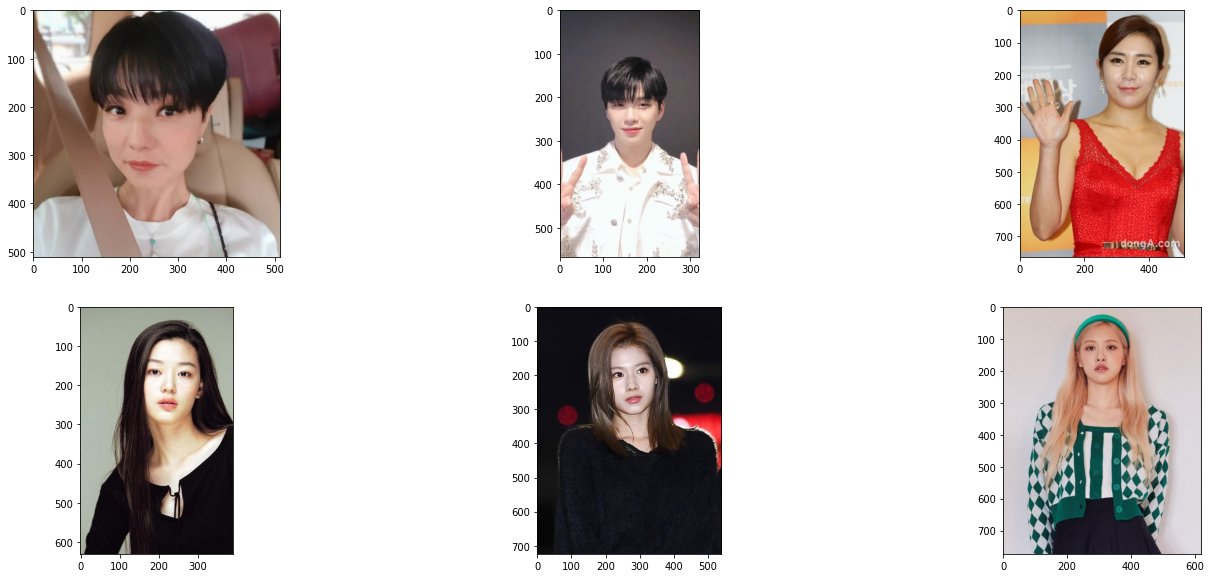

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/exploration/exploration_05/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#set figsize
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(24,10))

#flatten axes for easy iterting
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

### 2-2. 얼굴영역 자르기

In [3]:
#얼굴 영역만 자르는 함수 생성
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
  
    return cropped_face

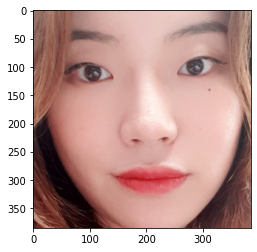

In [4]:
image_path = os.getenv('HOME')+'/aiffel/exploration/exploration_05/images/이소희.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

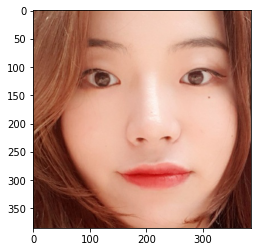

In [29]:
image_path = os.getenv('HOME')+'/aiffel/exploration/exploration_05/images/이소희2.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### 2-3. 자른 이미지 PIL Image로 변환한 후 저장하기

In [5]:
path_to_save = '/aiffel/aiffel/exploration/exploration_05/pil_images/'
for file in file_list:
    image_path = os.getenv('HOME')+'/aiffel/exploration/exploration_05/images/'+ file
    if image_path.endswith('points'): #checkpoints넘어가기
        break
    print(image_path)
    cropped_face = get_cropped_face(image_path)
    pillow_image = Image.fromarray(cropped_face)
    pillow_image.save(path_to_save+'pil_'+file)

/aiffel/aiffel/exploration/exploration_05/images/안영미.jpeg
/aiffel/aiffel/exploration/exploration_05/images/강다니엘.jpeg
/aiffel/aiffel/exploration/exploration_05/images/허안나.jpeg
/aiffel/aiffel/exploration/exploration_05/images/전지현.jpeg
/aiffel/aiffel/exploration/exploration_05/images/사나.jpeg
/aiffel/aiffel/exploration/exploration_05/images/로제.jpeg
/aiffel/aiffel/exploration/exploration_05/images/박서준.jpeg
/aiffel/aiffel/exploration/exploration_05/images/이소희.jpeg
/aiffel/aiffel/exploration/exploration_05/images/김사랑.jpeg
/aiffel/aiffel/exploration/exploration_05/images/수지.jpeg
/aiffel/aiffel/exploration/exploration_05/images/김태희.png
/aiffel/aiffel/exploration/exploration_05/images/이은형.jpeg
/aiffel/aiffel/exploration/exploration_05/images/티파니.jpeg
/aiffel/aiffel/exploration/exploration_05/images/윤아.jpeg
/aiffel/aiffel/exploration/exploration_05/images/김숙.jpeg
/aiffel/aiffel/exploration/exploration_05/images/박진영.jpeg
/aiffel/aiffe

*주의할 점*

내가 쓸 사진에서 얼굴의 비율이 너무 크면 get_cropped_face함수에서 list out of index 에러가 뜬다. 상반신이 어느정도 나오는 사진이어야 제대로 크롭되는 것을 확인했다. 

## 3. 얼굴영역의 임베딩 추출하기

In [6]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [7]:
#하나의 파일에 대한 임베딩 구하기
image_file = os.path.join(dir_path, '안영미.jpeg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.07726739,  0.05314427,  0.00443928, -0.09258045, -0.10431684,
        -0.0194015 , -0.05012529, -0.10698312,  0.14868188, -0.14222118,
         0.14955704, -0.10104264, -0.24929543, -0.01053743, -0.09673134,
         0.26234174, -0.13235675, -0.16422617, -0.07320591, -0.00681453,
         0.06797384,  0.09901779, -0.01579827,  0.08322453, -0.14353019,
        -0.27230111, -0.07523051, -0.05942966, -0.08188073, -0.1030933 ,
        -0.02625835,  0.10440931, -0.13046062,  0.01507694,  0.06333224,
         0.12308944, -0.00682481, -0.07319078,  0.12857243,  0.04142021,
        -0.34042788,  0.09054402,  0.07754163,  0.26792488,  0.19427517,
        -0.02033097, -0.0267153 , -0.17209119,  0.11893273, -0.19698919,
        -0.0215334 ,  0.10843445,  0.01019814,  0.05462508,  0.02505507,
        -0.10098192,  0.04647963,  0.11144648, -0.14766522, -0.03558834,
         0.14475755, -0.08145174, -0.00750821, -0.14062333,  0.1470561 ,
         0.02795849, -0.1479674 , -0.19600751,  0.0

In [11]:
#얼굴에 대한 임베딩 구해 딕셔너리로 반환하기
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        if img_path.endswith('points'):
            break
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)
print(embedding_dict['안영미'])


[-0.07726739  0.05314427  0.00443928 -0.09258045 -0.10431684 -0.0194015
 -0.05012529 -0.10698312  0.14868188 -0.14222118  0.14955704 -0.10104264
 -0.24929543 -0.01053743 -0.09673134  0.26234174 -0.13235675 -0.16422617
 -0.07320591 -0.00681453  0.06797384  0.09901779 -0.01579827  0.08322453
 -0.14353019 -0.27230111 -0.07523051 -0.05942966 -0.08188073 -0.1030933
 -0.02625835  0.10440931 -0.13046062  0.01507694  0.06333224  0.12308944
 -0.00682481 -0.07319078  0.12857243  0.04142021 -0.34042788  0.09054402
  0.07754163  0.26792488  0.19427517 -0.02033097 -0.0267153  -0.17209119
  0.11893273 -0.19698919 -0.0215334   0.10843445  0.01019814  0.05462508
  0.02505507 -0.10098192  0.04647963  0.11144648 -0.14766522 -0.03558834
  0.14475755 -0.08145174 -0.00750821 -0.14062333  0.1470561   0.02795849
 -0.1479674  -0.19600751  0.08760355 -0.19508968 -0.11050544  0.1313522
 -0.1471924  -0.18786357 -0.31385416 -0.0186931   0.33965537  0.16300069
 -0.13035053  0.10429744  0.04336413  0.06946052  0.12

## 4. 모은 연예인들과 비교하기

### 4-1. 나 자신의 임베딩 비교하기

In [10]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [12]:
get_distance('이소희','이소희2')

0.20807556180848988

- 내 사진들끼리 비교해서 닮았음을 확인하는 베이스라인으로 선정.
- 어느정도 효과적인 베이스라인으로 만들기 위해 같은 날 찍은 사진으로 설정했다. 

### 4-2. 모은 연예인들과 비교하기

In [13]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [14]:
sort_key_func = get_sort_key_func('이소희') 

In [18]:
def get_nearest_face(name, top=6):
    sort_key_func= get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
get_nearest_face('이소희')

순위 1 : 이름(이소희2), 거리(0.20807556180848988)
순위 2 : 이름(안소희), 거리(0.39126522152982807)
순위 3 : 이름(김진경), 거리(0.4071807740257326)
순위 4 : 이름(수지), 거리(0.40819512353139187)
순위 5 : 이름(이솜), 거리(0.412959309771584)
순위 6 : 이름(다현), 거리(0.4248687907195682)


In [26]:
get_nearest_face('이소희2')

순위 1 : 이름(이소희), 거리(0.20807556180848988)
순위 2 : 이름(안소희), 거리(0.37795915029991944)
순위 3 : 이름(수지), 거리(0.3988365678668546)
순위 4 : 이름(유리), 거리(0.41299864120908814)
순위 5 : 이름(슬기), 거리(0.4167237044081086)
순위 6 : 이름(김진경), 거리(0.42088648760906766)


### 결과 해석

- 내 다른 사진이 가장 닮았다고 나왔으므로, 효과적인 베이스라인이라고 할 수 있다. 
- 내가 현재 무쌍인데, 이번 결과에서 거의 대부분의 연예인들이 무쌍이어서 나름 비슷한 얼굴을 찾은 것 같다. 
- 또한, 이소희와 이소희2의 경우를 둘 다 체크해 보았을 떄, 3명의 연예인들이 두가지 경우 모두 나와서 어느 정도 비슷한 연예인을 찾은 것 같다. 
- 하지만 어떻게 다른 연예인들이 나올 수 있었는지 조금 궁금해졌다 -> 나의 가설: 아마 정규화하면서 내 사진들에 가까운 사진들이 방향이 다르게 분포해서 이 둘 사진의 거리는 가까워도 다른 사진들과의 거리는 멀어져서 그러지 않았을까?